# EDA

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# este df contiene los datos de una empresa que concede préstamos hipotecários en función de ciertos requisitos

df = pd.read_csv("../regresion_logistica/ficheros/loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Columnas:

Loan_ID: Unique Loan ID

Gender:	Male/ Female

Married: Applicant married (Y/N)

Dependents:	Number of dependents

Education:	Applicant Education (Graduate/ Under Graduate)

Self_Employed:	Self-employed (Y/N)

ApplicantIncome: Applicant income

CoapplicantIncome: Coapplicant income

LoanAmount:	Loan amount in thousands

Loan_Amount_Term: Term of a loan in months

Credit_History:	credit history meets guidelines - si cumple el historial crediticio conforme a las directrices

Property_Area: Urban/ Semi-Urban/ Rural

Loan_Status:	Loan approved (Y/N)

## Variable respuesta: *loan_status*

### Análisis exploratorio de los datos:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [6]:
df.describe(include="object").T

,count,unique,top,freq
Loan_ID,614,614,LP001002,1
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [7]:
df.duplicated().sum()

0

### Conocemos los valores únicos de las columnas aparentemente más interesantes:

In [8]:
df["Gender"].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df["Married"].value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [10]:
df["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [11]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [12]:
df["Self_Employed"].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [13]:
df["Loan_Amount_Term"].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [14]:
df["Credit_History"].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [15]:
# antes de continuar cambiamos los nombres de las columnas

nuevas_col = {col:col.lower() for col in df.columns}
df.rename(columns=nuevas_col, inplace = True)

### Analizamos los nulos en cada caso:

In [16]:
df.isnull().sum()/df.shape[0]

loan_id              0.000000
gender               0.021173
married              0.004886
dependents           0.024430
education            0.000000
self_employed        0.052117
applicantincome      0.000000
coapplicantincome    0.000000
loanamount           0.035831
loan_amount_term     0.022801
credit_history       0.081433
property_area        0.000000
loan_status          0.000000
dtype: float64

In [17]:
# borramos los nulos para las columnas siguientes, ya que suponen un porcentaje ínfimo y que no afecta al conjunto de los datos

df.dropna(subset = ["gender", "married", "self_employed", "dependents", "credit_history"], axis = 0 , inplace= True)

In [18]:
# conocemos los estadisticos para la columna loan_amount_term

print(df["loan_amount_term"].mean())
print(df["loan_amount_term"].median())
print(df["loan_amount_term"].mode())

342.0120240480962
360.0
0    360.0
Name: loan_amount_term, dtype: float64


In [19]:
# sustituimos por la mediana

df["loan_amount_term"].fillna(df["loan_amount_term"].median(), inplace = True)

In [20]:
# conocemos los estadisticos para la columna loan_amount

print(df["loanamount"].mean())
print(df["loanamount"].median())
print(df["loanamount"].mode())

144.1361788617886
128.0
0    120.0
Name: loanamount, dtype: float64


In [21]:
# sustituimos por la mediana

df["loanamount"].fillna(df["loanamount"].median(), inplace = True)

In [22]:
# comprobamos que todos los nulos han quedado eliminados

df.isnull().sum()

loan_id              0
gender               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

### Gestionamos los outliers:

In [63]:
numericas = df.select_dtypes(include=np.number)
numericas.drop(["credit_history","loan_amount_term"], axis=1, inplace=True)
numericas.head(2)

,applicantincome,coapplicantincome,loanamount
0,5849,0.0,128.0
1,4583,1508.0,128.0


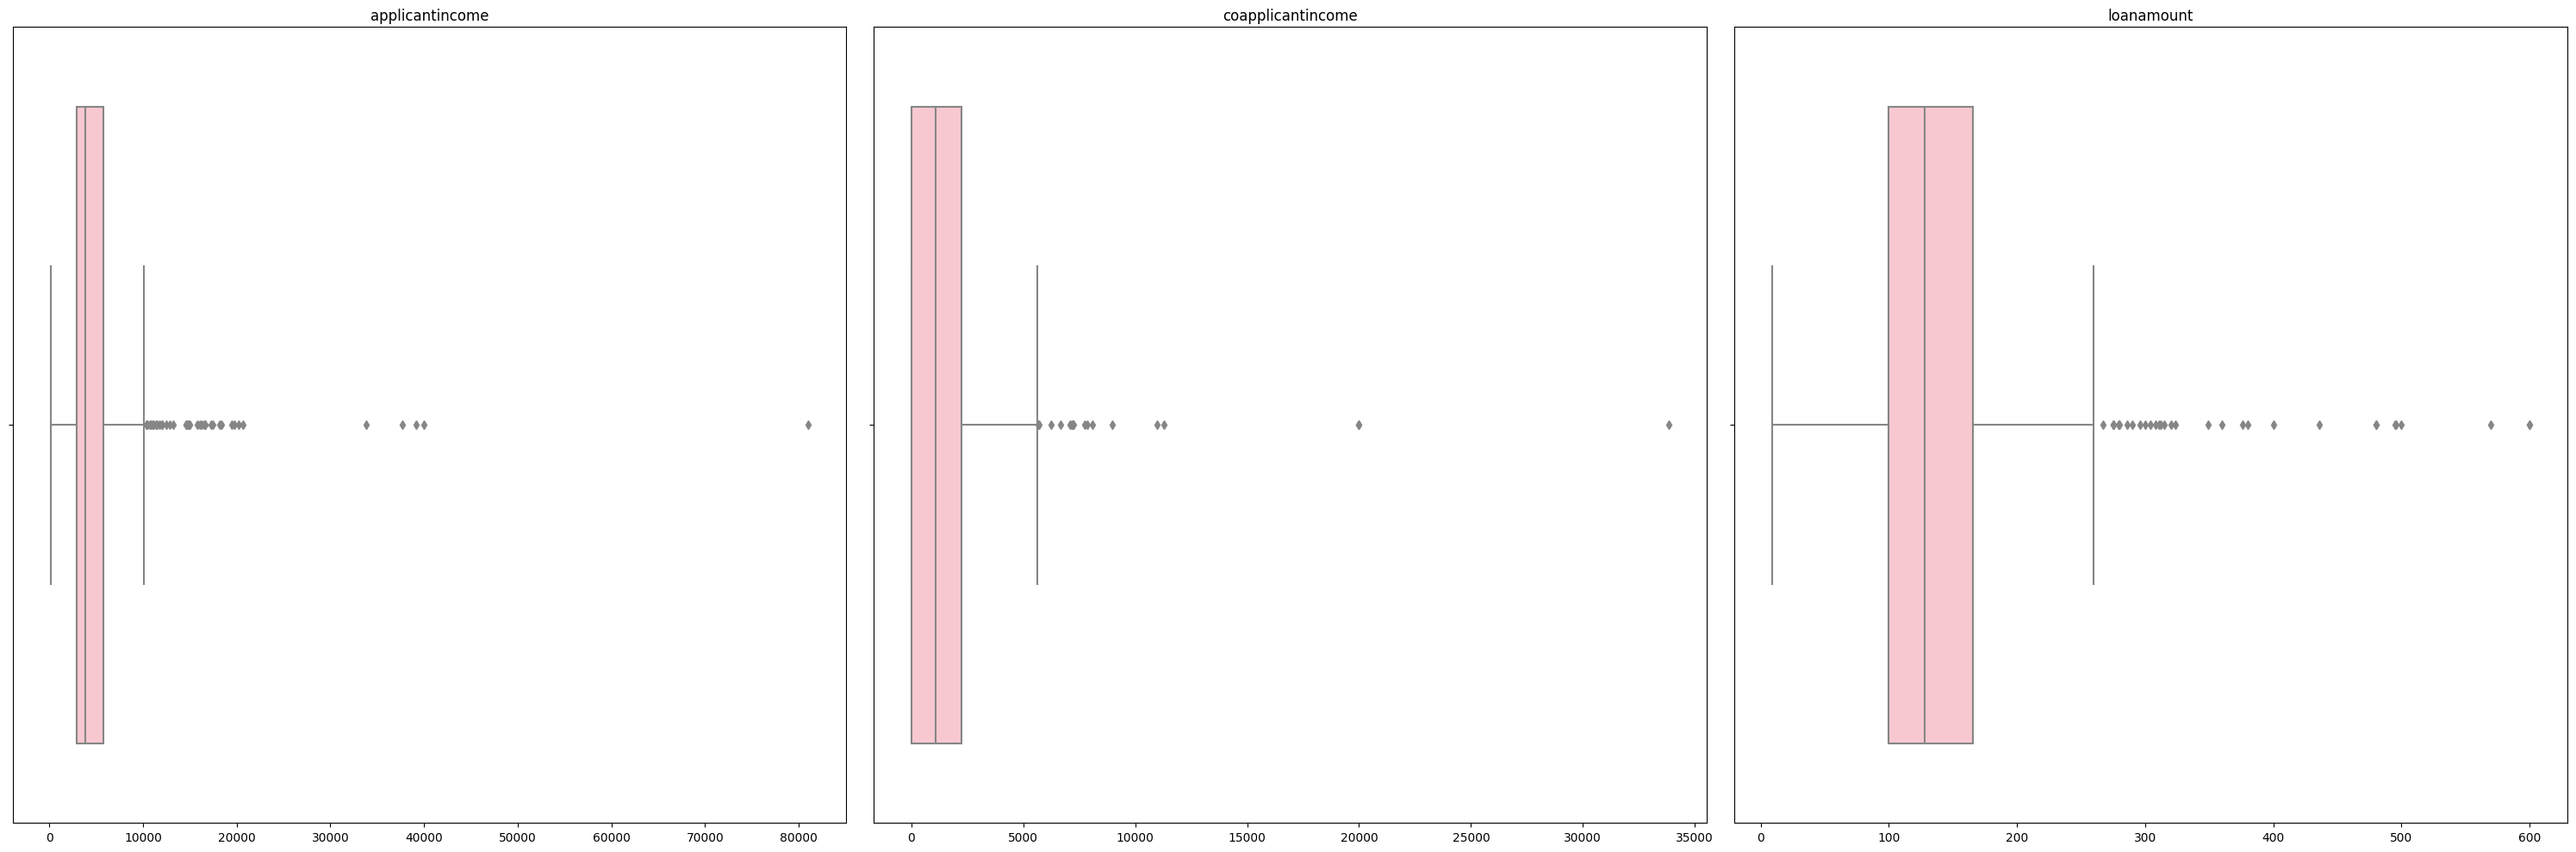

In [65]:
fig, axes = plt.subplots(1, 3, figsize=(30,10))

axes = axes.flat

for indice, cate in enumerate(numericas.columns):

    sns.boxplot(x = df[cate], data = df, ax=axes[indice], color = "pink"); 

    axes[indice].set_title(cate)
    axes[indice].set_xlabel("")


fig.tight_layout();

A simple vista vemos que los *coaplicants* tienen menos ingresos que los *aplicants*. Observamos una tendencia que nos indica que a mayor ingreso, más alta es la cantidad solicitada. Comprobamos esta teoría con otras gráficas.

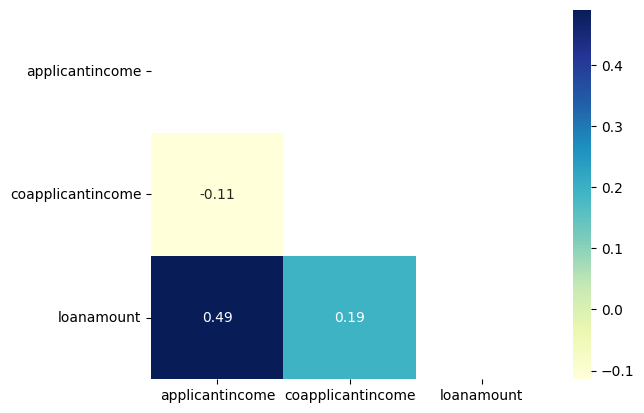

In [66]:
mask = np.triu(np.ones_like(numericas.corr(), dtype=np.bool))

sns.heatmap(numericas.corr(), 
            cmap = "YlGnBu", 
           annot = True, 
           mask = mask); 

Vemos que hay muy poca correlación entre los aplicantes y los coaplicantes y entre ellos y la cantidad pedida.

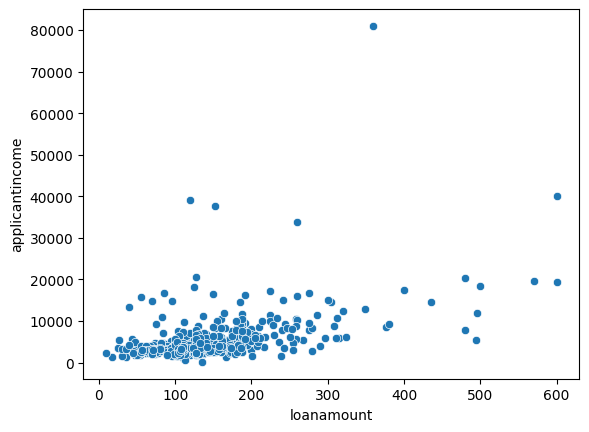

In [26]:
sns.scatterplot(data=numericas, x = "loanamount", y = "applicantincome") ;

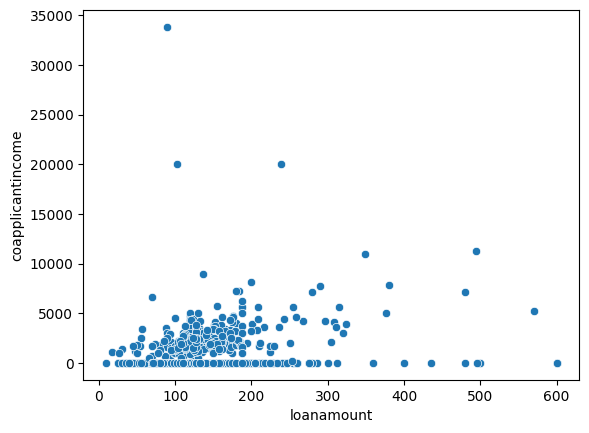

In [27]:
sns.scatterplot(data=numericas, x = "loanamount", y = "coapplicantincome") ;

Confirmamos que la relación entre la cantidad y el ingreso de los aplicantes y coaplicantes no existe a penas, ya que los salarios más altos no se corresponden con las cantidades pedidas más altas. Visto esto, hemos decidido quedarnos con los datos de aquellos aplicantes con un salario menor a 20000.

In [28]:
df_mayores = df[df["applicantincome"] > 20000]

In [29]:
df_mayores["applicantincome"].min()

20233

In [30]:
# guardamos el df de mayores para hacer un modelo a parte en otro momento.

df_mayores.to_csv("../regresion_logistica/ficheros/income_mayores20000.csv")

In [31]:
df_menores = df[df["applicantincome"] <= 20000]

### Examinamos los tipos de datos solo para *df_menores* y seguimos limpiando:

In [32]:
df_menores.dtypes

loan_id               object
gender                object
married               object
dependents            object
education             object
self_employed         object
applicantincome        int64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history       float64
property_area         object
loan_status           object
dtype: object

In [33]:
# cambiamos el tipo de dato para aquellas columnas que es necesario

columnas_categoria = ["gender", "married", "dependents", "education", "self_employed", "property_area", "loan_status"]

for i in columnas_categoria:
    df_menores[i] = df_menores[i].astype("category")

In [34]:
df_menores["credit_history"] = df_menores["credit_history"].astype(int)

In [35]:
# eliminamos la columna loan_id ya que no es necesaria para el modelo

df_menores.drop("loan_id", axis=1, inplace = True)

In [36]:
df_menores.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y


In [48]:
status_education = df_menores.groupby('education')['loan_status'].count()
pd.DataFrame(status_education)

,loan_status
education,
Graduate,394
Not Graduate,110


In [49]:
status_area= df_menores.groupby("property_area")['loan_status'].count()
pd.DataFrame(status_area)

,loan_status
property_area,
Rural,146
Semiurban,193
Urban,165


In [51]:
status_amount= df_menores.groupby("loan_amount_term")['loan_status'].count()
pd.DataFrame(status_amount)

,loan_status
loan_amount_term,
36.0,2
60.0,2
84.0,3
120.0,3
180.0,37
240.0,2
300.0,9
360.0,434
480.0,12


In [52]:
# agrupamos la columna loan_amount_term en 3 categorías
df_menores["loan_amount_term"] = pd.cut(df_menores["loan_amount_term"], bins = [35.0, 85.0, 239.0, 481.0], labels= ["corto", "medio", "largo"]) 

In [53]:
df_menores["loan_amount_term"].isnull().sum()

0

In [54]:
df_menores["dependents"].unique()

['0', '1', '2', '3+']
Categories (4, object): ['0', '1', '2', '3+']

In [55]:
# quitamos el simbolo + al 3

def sustituir(col):
    for i in col:
        return i.replace("3+","3")

In [56]:
df_menores["dependents"] = df_menores["dependents"].apply(sustituir)

In [57]:
df_menores.head()

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,No,0,Graduate,No,5849,0.0,128.0,largo,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,largo,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,largo,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,largo,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,largo,1,Urban,Y


In [58]:
fig, axes = plt.subplots(nrows = 4, ncols = 3, figsize = (100, 80))
axes = axes.flat
for i, colum in enumerate(df_menores.columns): 
    sns.histplot(
        data = df_menores[colum],
        kde = True,
        color = "violet", 
        line_kws = {"linewidth": 2}, 
        alpha = 0.5,
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 40, fontweight = "bold")
    axes[i].tick_params(labelsize = 35)
    axes[i].set_xlabel("")

fig.tight_layout();

### Vemos algunos detalles más en profundidad para conocer mejor el df:

In [59]:
print(df_menores["loanamount"].max())
print(df_menores["loanamount"].min())

600.0
9.0


In [60]:
df_menores[(df_menores["loanamount"] == 600.0)]

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
561,Female,Yes,1,Graduate,Yes,19484,0.0,600.0,largo,1,Semiurban,Y


In [61]:
df_menores[(df_menores["loanamount"] == 9.0)]

,gender,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
568,Female,No,0,Graduate,No,2378,0.0,9.0,largo,1,Urban,N


Tanto el préstamo más alto como el más bajo, fueron solicitados por mujeres con estudios. 

El más alto se aprobó para el área semiurbana y la mujer estaba casada. El más bajo fue denegado para una mujer soltera para el área urbana.

Tras la exploración de los datos concluimos lo siguiente:

- se conceden más préstamos de los que se deniegan
- se conceden más préstamos a largo plazo
- las hipotecas se solicitan más para las zonas semiurbanas
- hay más cantidad de personas que se ajustan a las condiciones hipotecarias
- según nuestros datos, las características de los applicants con más préstamos concedidos son: hombre, con estudios, casado, trabajador por cuenta ajena y sin hijos

In [62]:
df_menores.to_csv("../regresion_logistica/ficheros/loan_limpio_menores.csv", index=False)